# **BIODATA**
Nama : Kevin Caesar

NIM : 162012133057

UNIV : Universitas Airlangga

# Business Understanding
sarah sebagai regional sales manager ingin mengestimasi berapa banyak minyak pemanas yang harus disiapkan agar memenuhi permintaan customer baru. dengan hal tersebut.diharapkan dia dapat mengantisipasi adanya kelebihan atau kekurangan jumlah permintaan atau produk

# Stock level
predictive stock level untuk kecukupan pelanggan baru sebanyak 42.650 pelanggan. pelanggan yg ada (curent pelanggan) 1218 pelanggan.

artinya ibu sarah harus menckupi ketersediaan heating oil untuk 42.650 + 1218

case-- Supervised Learning  -- estimasi

algoritma estimasi:
1. Liniear regresion
2. ANN MLP (Multi Layer Perception)

# Data Understanding

In [ ]:
#LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv'

In [ ]:
#loading data
load_heatingOil = pd.read_csv(path)

#membentuk dataframe
df = pd.DataFrame(load_heatingOil)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [ ]:
df.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


# Analisis Korelasi

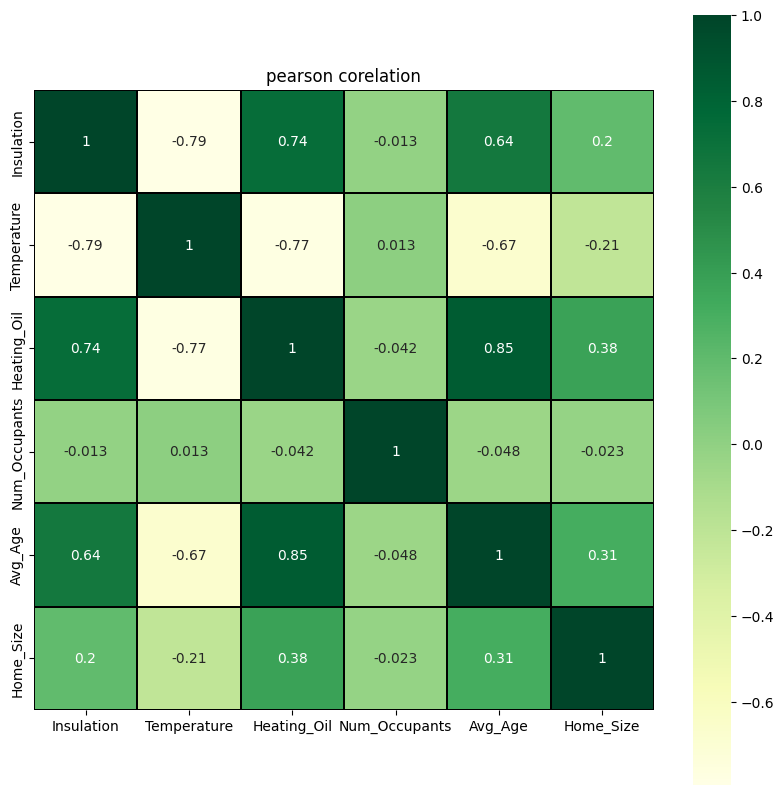

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
plt.title('pearson corelation')
sns.heatmap(df.astype(float).corr(),linewidth=0.25, vmax =1.0,square =True,cmap='YlGn', linecolor='black', annot=True)
plt.show()

## Hasil analisis berguna untu feature selection

dependen : HeatingOil

1. ada hubungannya positif menguatkan antara insulation dengan heating oil

2. ada hubungan negatif melemahkan antara temperature dengan heating oil. semakin suhunya tinggi maka kebutuhan heatingoil semakin dikit

3. ada hubungan negatif melemahkan antara num_occupants dengan heatingoil. artinya semakin banyak org yang tinggal di dalam rumah tsb, maka semakin sedikit kebutuhan heatingoil hasil menunjukkan 0.42 (tidk signifikan)

4. semakin tinggi usia rata2 penghuni rata2 penghuni maka semakin tinggi kebutuhan heating oil

5. tidak ada hubungan yang memengaruhi scr signifikan antara home size dengan heatingoil

# Data Preparation

In [ ]:
df.columns

Index(['Insulation', 'Temperature', 'Heating_Oil', 'Num_Occupants', 'Avg_Age',
       'Home_Size'],
      dtype='object')

In [ ]:
#Input Variabel
x = df[['Insulation', 'Temperature', 'Avg_Age','Home_Size']]

#Target Variabel
y= df['Heating_Oil']

# Pemodelan Data

In [ ]:
#split training and testing
from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

## Liniear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()

# Training Model

# Memodelkan data
model_ln = ln.fit(x_train, y_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

### Evaluasi Liniear Regression
1. MAPE
2. R2
3. MAE

In [ ]:
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
# Nilai R2
print('R Square ',metrics.r2_score(y_test,pred_ln))

R Square  0.8113780027125741


In [ ]:
#membuat script MAPE

def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred))/y_true)*100
print('MAPE :', mean_absolute_percentage_error(y_test,pred_ln))

MAPE : 7.854285481976761


## ANN
(ANN) atau Jaringan Saraf Tiruan merupakan salah satu pemodelan kompleks yang dapat memprediksi bagaimana ekosistem merespon perubahan variabel lingkungan dengan terinspirasi oleh cara kerja sistem saraf biologis, khususnya pada sel otak manusia dalam memproses informasi.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# ReLU : fungsi aktivasi untuk memungkinkan model menyelesaikan masalah non linier
# ReLU (Rectified Linear Unit)
mlp = MLPRegressor()

# Memodelkan Data Menggunakan Algoritma ANN
model_mlp = mlp.fit(x_train, y_train)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluasi ANN

In [ ]:
# Nilai R^2
print('R Square :', metrics.r2_score(y_test,pred_mlp))

R Square : 0.7699944973055202


In [ ]:
#membuat script MAPE

def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred))/y_true)*100
print('MAPE :', mean_absolute_percentage_error(y_test,pred_mlp))

MAPE : 7.110007060691689


karena meninjau dari nilai MAPE yang menilai error suatu prediksi dengan hasil lebih rendah, dirasa lebih faktual dengan data real yang ada. mungkin kalau liniearitasnya yang tinggi  tapi errornya  yang besar itu terhitung sedikit overfit

maka dipilih model ann MLPRegression dengan nilai MAPE = 7.4

# Implementasi Model

In [ ]:
path1 ='/content/drive/MyDrive/DataSource/heatingOilNewust.csv'

In [ ]:
load_ho = pd.read_csv(path1)
df1 = pd.DataFrame(load_ho)
df1.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


In [ ]:
df1.columns

Index(['Insulation', 'Temperature', 'Num_Occupants', 'Avg_Age', 'Home_Size'], dtype='object')

In [ ]:
x1 = df1[['Insulation', 'Temperature',  'Avg_Age', 'Home_Size']]

In [ ]:
prediction =model_mlp.predict(x1)
prediction

array([273.19279503, 238.62909876, 257.63216929, ..., 124.69483142,
       262.96032081, 249.21499863])

In [ ]:
df_result = pd.DataFrame({'Prediction':prediction}).round(2)
df_result.head()

,Prediction
0,273.19
1,238.63
2,257.63
3,228.15
4,129.08


In [ ]:
#menggabungkan data frame hasil prediksi dengan data variabel input

df_pred_ho =pd.concat([df1,df_result],sort = True, axis = 1)
df_pred_ho.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction
0,5,69,10,70.1,7,273.19
1,5,80,1,66.7,1,238.63
2,4,89,9,67.8,7,257.63
3,7,81,9,52.4,6,228.15
4,4,58,8,22.9,7,129.08


In [ ]:
df_pred_ho['Prediction'].sum()

8278449.7

In [ ]:
# kebutuhan heating oil untuk customer yang sudah ada (current customer)
df['Heating_Oil'].sum()

240426

In [ ]:
# eksport to csv
# export as download if in colab
from google.colab import files

# menyimpan file / export file to local komputer output csv file

df_pred_ho.to_csv('df_pred_ho.csv',sep=',')
files.download('df_pred_ho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xlsx = df_pred_ho.to_excel('result_heating_oil.xlsx',sheet_name ='sheet1')
files.download('result_heating_oil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**stock yang harus disediakan untuk new customer =  liter 8.278.449 Liter**

**kebutuhan heating oil untuk customer yang sudah ada (current customer) 240.426**